## Project Description - Getting a Good Night's Sleep
Sleep is essential for both physical and mental health. Quality sleep repairs cells, consolidates memories, wards off disease, and much more. In this project, I worked for SleepInc, a sleep-tracking startup, to analyze anonymous sleep data from their SleepScope app to uncover insights into lifestyle factors affecting sleep quality and duration.

SleepInc shared anonymized sleep data from their hot new sleep tracking app SleepScope. My task is to analyze the lifestyle survey data with Python to discover relationships between exercise, gender, occupation, and sleep quality. To identify patterns leading to insights on sleep quality.

💾 The data: sleep_health_data.csv
SleepInc has provided anonymized dataset of sleep and lifestyle metrics for 374 individuals. This dataset contains average values for each person calculated over the past six months. The data is saved as sleep_health_data.csv.

The dataset includes 13 columns covering sleep duration, quality, disorders, exercise, stress, diet, demographics, and other factors related to sleep health.

Column	Description
- Person ID	An identifier for each individual.
- Gender	The gender of the person (Male/Female).
- Age	The age of the person in years.
- Occupation	The occupation or profession of the person.
- Sleep Duration (hours)	The average number of hours the person sleeps per day.
- Quality of Sleep (scale: 1-10)	A subjective rating of the quality of sleep, ranging from 1 to 10.
- Physical Activity Level (minutes/day)	The average number of minutes the person engages in physical activity daily.
- Stress Level (scale: 1-10)	A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
- BMI Category	The BMI category of the person (e.g., Underweight, Normal, Overweight).
- Blood Pressure (systolic/diastolic)	The average blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
- Heart Rate (bpm)	The average resting heart rate of the person in beats per minute.
- Daily Steps	The average number of steps the person takes per day.
- Sleep Disorder	The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

In [1]:
# Importing Relevant Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("sleep_health_data.csv")
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
df['Sleep Disorder'].value_counts()

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

In [5]:
df['Sleep Disorder'].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [6]:
df['Sleep Disorder'].isnull().sum()

219

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [9]:
# Convert column to timedelta format
# df['Sleep Duration'] = pd.to_timedelta(df['Sleep Duration'])

In [10]:
# Calculate average duration
# df['avg_sleep_duration'] = df['Sleep Duration'].mean()
# df['avg_sleep_duration']

In [11]:
# Calculate average sleep duration per occupation
avg_sleep_by_occupation = df.groupby('Occupation')['Sleep Duration'].mean()
avg_sleep_by_occupation

Occupation
Accountant              7.113514
Doctor                  6.970423
Engineer                7.987302
Lawyer                  7.410638
Manager                 6.900000
Nurse                   7.063014
Sales Representative    5.900000
Salesperson             6.403125
Scientist               6.000000
Software Engineer       6.750000
Teacher                 6.690000
Name: Sleep Duration, dtype: float64

In [12]:
# Find the occupation with the lowest average sleep duration
lowest_sleep_occ = avg_sleep_by_occupation.idxmin()
lowest_sleep_occ

'Sales Representative'

In [13]:
# Which occupation has the lowest average sleep quality? Save this in a string variable called lowest_sleep_quality_occ. 
#Did the occupation with the lowest sleep duration also have the lowest sleep quality? If so assign a boolean value to variable same_occ variable, 
# True if it is the same occupation, and False if it isn't.

# Calculate average sleep quality per occupation
avg_sleep_quality_by_occupation = df.groupby('Occupation')['Quality of Sleep'].mean()
avg_sleep_quality_by_occupation 


Occupation
Accountant              7.891892
Doctor                  6.647887
Engineer                8.412698
Lawyer                  7.893617
Manager                 7.000000
Nurse                   7.369863
Sales Representative    4.000000
Salesperson             6.000000
Scientist               5.000000
Software Engineer       6.500000
Teacher                 6.975000
Name: Quality of Sleep, dtype: float64

In [14]:
# Find the occupation with the lowest average sleep Quality
lowest_sleep_quality_occ = avg_sleep_quality_by_occupation.idxmin()
lowest_sleep_quality_occ

'Sales Representative'

In [15]:
same_occ = lowest_sleep_occ == lowest_sleep_quality_occ
same_occ

True

In [16]:
df.head(2)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN


In [17]:
# Let's explore how BMI Category can affect sleep disorder rates. Start by finding what ratio of app users in each BMI Category have been diagnosed 
# with Insomnia. Create a dictionary named: bmi_insomnia_ratios. The key should be the BMI Category as a string, 
# while the value should be the ratio of people in this category with insomnia as a float rounded to two decimal places. Here is an example:

bmi_insomnia_ratios = {
    "Normal": float,
    "Overweight": float,
    "Obese": float
}

# Count users with Insomnia in each BMI category
bmi_insomnia_ratios = (
    df[df['Sleep Disorder'] == "Insomnia"]
    .groupby('BMI Category')
    .size()
    .div(df.groupby('BMI Category').size())  # Get the ratio
    .round(2)  # Round to two decimal places
    .to_dict()
)

# Print result
print(bmi_insomnia_ratios)


{'Normal': 0.04, 'Obese': 0.4, 'Overweight': 0.43}


In [18]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [20]:
df['Gender'].value_counts()

Gender
Male      189
Female    185
Name: count, dtype: int64

In [21]:
df['Occupation'].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [22]:
df['Sleep Disorder'].value_counts()

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

In [23]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna("None")
df['Sleep Disorder']

0             None
1             None
2             None
3      Sleep Apnea
4      Sleep Apnea
          ...     
369    Sleep Apnea
370    Sleep Apnea
371    Sleep Apnea
372    Sleep Apnea
373    Sleep Apnea
Name: Sleep Disorder, Length: 374, dtype: object

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [25]:
#df['Blood Pressure'] = df['Blood Pressure'].astype(float)

#df['Blood Pressure'] = df['Blood Pressure'].apply(lambda x: float(x) if isinstance(x, str) else x)

df['Blood Pressure'].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

In [26]:
arr = df['Blood Pressure']

# Split into systolic and diastolic values
systolic = np.array([float(x.split('/')[0]) for x in arr])
diastolic = np.array([float(x.split('/')[1]) for x in arr])

arr = systolic/diastolic
df['Blood Pressure'] = arr

# Display results
print("Systolic:", systolic)
print("Diastolic:", diastolic)

print (arr)

Systolic: [126. 125. 125. 140. 140. 140. 140. 120. 120. 120. 120. 120. 120. 120.
 120. 120. 132. 120. 132. 120. 120. 120. 120. 120. 120. 120. 120. 120.
 120. 120. 130. 130. 117. 125. 120. 125. 125. 120. 120. 120. 120. 120.
 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 125. 120. 125. 125.
 120. 125. 125. 120. 125. 125. 125. 125. 125. 125. 118. 125. 128. 128.
 125. 125. 125. 125. 125. 125. 125. 125. 125. 125. 131. 131. 128. 128.
 120. 115. 125. 125. 125. 125. 125. 125. 120. 135. 115. 115. 115. 115.
 115. 115. 115. 115. 115. 129. 115. 129. 126. 120. 120. 130. 115. 130.
 115. 130. 115. 115. 115. 115. 115. 115. 115. 115. 115. 115. 115. 120.
 130. 115. 130. 130. 115. 130. 130. 115. 130. 130. 115. 130. 115. 130.
 115. 130. 115. 115. 130. 135. 130. 132. 128. 115. 115. 130. 130. 130.
 130. 130. 130. 130. 130. 130. 130. 119. 119. 130. 130. 130. 121. 125.
 125. 130. 130. 130. 130. 130. 130. 130. 130. 130. 130. 130. 130. 130.
 130. 130. 130. 130. 135. 130. 135. 130. 135. 130. 130. 130. 130. 1

In [27]:
df['Blood Pressure'].unique()

array([1.51807229, 1.5625    , 1.55555556, 1.5       , 1.51724138,
       1.51162791, 1.53947368, 1.55263158, 1.50588235, 1.52325581,
       1.52380952, 1.53333333, 1.53409091, 1.53571429, 1.52941176,
       1.47435897, 1.54545455, 1.53164557, 1.52439024, 1.525     ,
       1.54347826, 1.47368421, 1.52747253, 1.57333333])

In [28]:
df['Occupation'].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [29]:
df['Sleep Duration'].unique()

array([6.1, 6.2, 5.9, 6.3, 7.8, 6. , 6.5, 7.6, 7.7, 7.9, 6.4, 7.5, 7.2,
       5.8, 6.7, 7.3, 7.4, 7.1, 6.6, 6.9, 8. , 6.8, 8.1, 8.3, 8.5, 8.4,
       8.2])

In [30]:
df.head(2)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,1.518072,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,1.562500,75,10000,None


In [31]:
df['Quality of Sleep'].unique()

array([6, 4, 7, 5, 8, 9], dtype=int64)

In [32]:
df['Physical Activity Level'].unique()

array([42, 60, 30, 40, 75, 35, 45, 50, 32, 70, 80, 55, 90, 47, 65, 85],
      dtype=int64)

In [33]:
df['Stress Level'].unique()

array([6, 8, 7, 4, 3, 5], dtype=int64)

In [34]:
df['Heart Rate'].unique()

array([77, 75, 85, 82, 70, 80, 78, 69, 72, 68, 76, 81, 65, 84, 74, 67, 73,
       83, 86], dtype=int64)

In [35]:
df['Daily Steps'].unique()

array([ 4200, 10000,  3000,  3500,  8000,  4000,  4100,  6800,  5000,
        7000,  5500,  5200,  5600,  3300,  4800,  7500,  7300,  6200,
        6000,  3700], dtype=int64)

In [36]:
df['Age'].value_counts()

Age
43    34
44    30
37    20
38    20
50    20
31    18
32    17
53    17
59    16
39    15
45    14
33    13
30    13
29    13
35    12
36    12
41    12
49    11
57     9
52     9
42     9
51     8
54     7
58     6
28     5
40     4
48     3
55     2
56     2
34     2
27     1
Name: count, dtype: int64

In [37]:
# Univariate Analysis

# Visualizing the different features

# Creating the age column into groups

def age_group(age):
    if age <= 25:
        return("Minor(0-25)")
    elif age <= 35:
        return ("Youth(26-35)")
    elif age <= 55:
        return ("Adult(36-55)")
    else:
        return("Old Adult(>55)")
df["Age_group"] = df["Age"].apply(age_group)


def blood_Pressure(BP):
    if BP <= (90/60):
        return('Normal BP')
    elif BP <= (140/90):
        return('PreHBP')
    else:
        return ('HighBP')
df["BP_group"] = df["Blood Pressure"].apply(blood_Pressure)    


def Sleep_Duration(sleepdur):
    if sleepdur <= (6.9):
        return('Not Enough')
    else:
        return ('Enough Sleep')
df["Sleep_Duration"] = df["Sleep Duration"].apply(Sleep_Duration) 


def Sleep_Quality(Qualsleep):
    if Qualsleep <= (6.9):
        return('Poor')
    else:
        return ('Good')
df["Sleep_Quality"] = df["Quality of Sleep"].apply(Sleep_Quality)

# https://www.researchgate.net/publication/271907800/figure/tbl1/AS:668998760947718@1536513142432/Classification-of-the-level-of-activity-according-to-the-Polar-Fitness-TestR-14.png
def Physical_Activity_Level(PAL):
    if PAL < (30):
        return('Low')
    elif PAL <= (60):
        return('Medium')
    elif PAL <= (180):
        return('High')
    else:
        return ('Maximum')
df["Physical_Activity_Level"] = df["Physical Activity Level"].apply(Physical_Activity_Level)

# https://190vision.com/wp-content/uploads/2022/08/Stress-Level.png
def Stress_Level(STL):
    if STL <= (3):
        return('Low SL')
    elif STL <= (7):
        return('Moderate SL')
    else:
        return ('High SL')
df["Stress_Level"] = df["Stress Level"].apply(Stress_Level)


def Daily_Steps(DSteps):
    if DSteps < (5000):
        return('Sedentary')
    elif DSteps < (7500):
        return('Low Active')
    elif DSteps < (10000):
        return('Somewhat Active')
    else:
        return ('Highly Active')
df["Daily_Steps"] = df["Daily Steps"].apply(Daily_Steps)


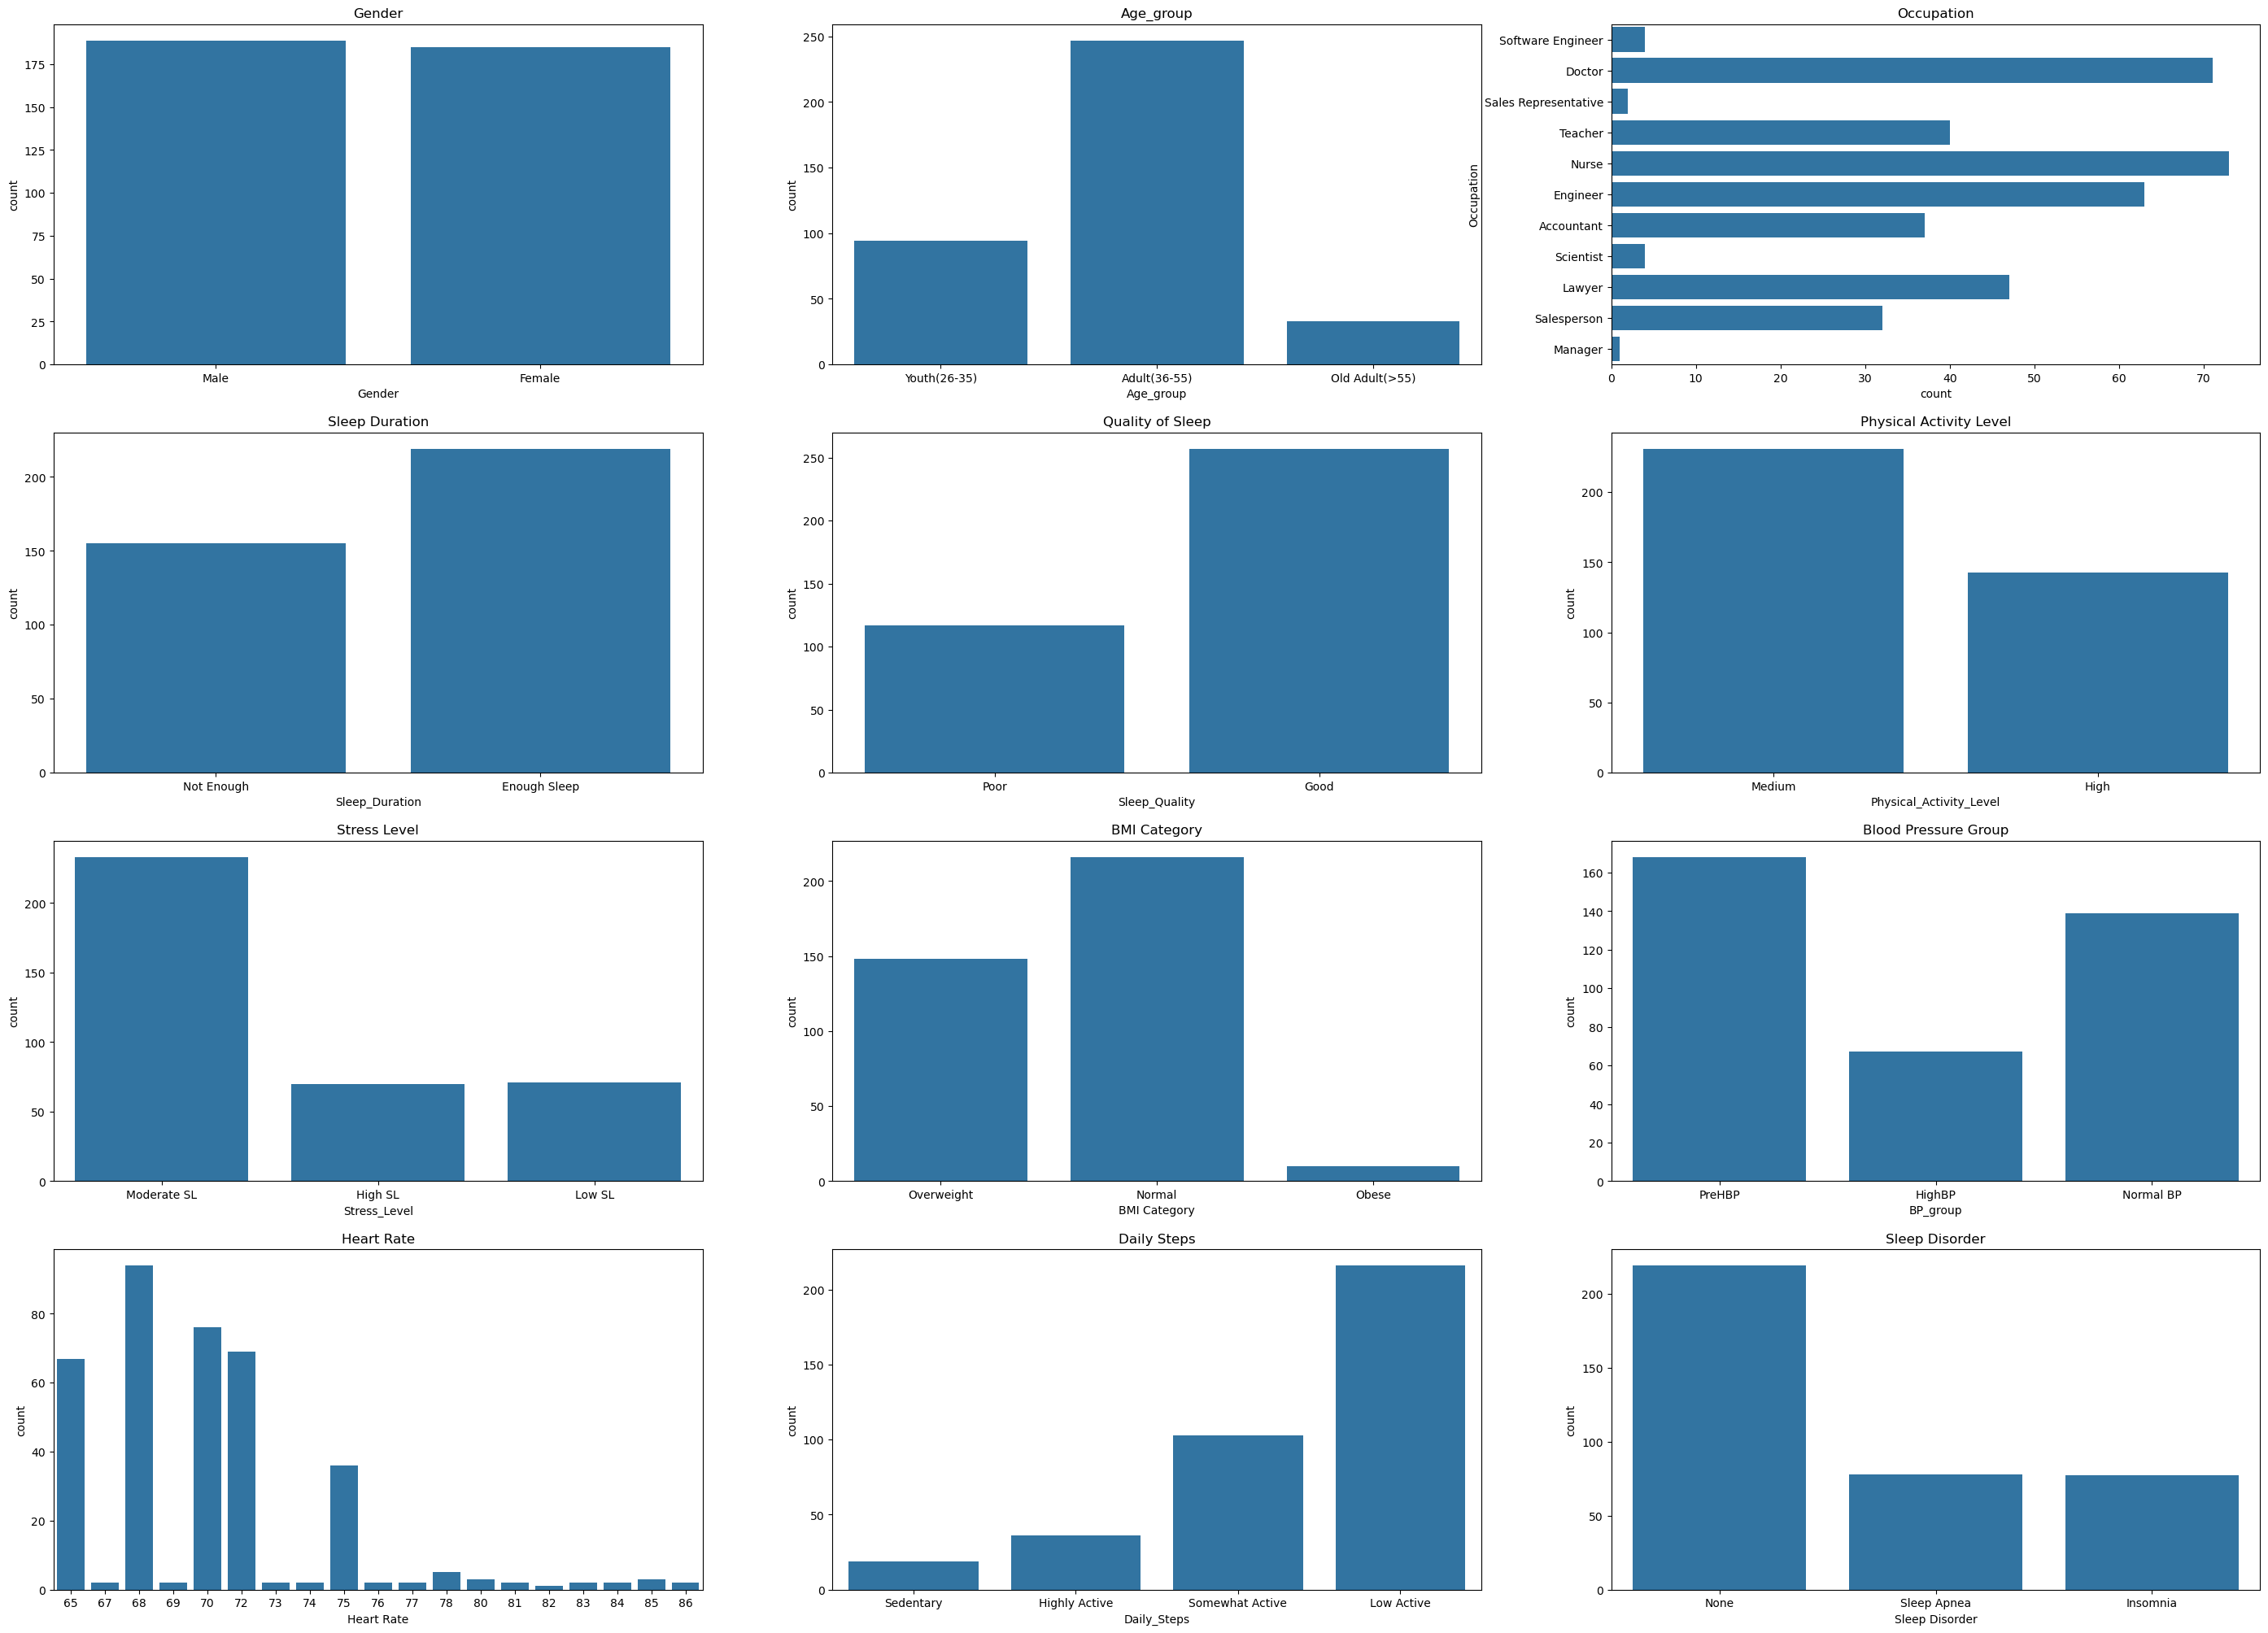

In [38]:

fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(35, 25))
sns.countplot(x="Gender", data = df, ax=axs[0,0])
axs[0,0].set_title("Gender")

sns.countplot(x="Age_group", data = df, ax=axs[0,1])
axs[0,1].set_title("Age_group")

#feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

sns.countplot(y=df['Occupation'], data = df, ax=axs[0,2])
axs[0,2].set_title("Occupation")

#sns.countplot(x=df["Occupation"].sort_values(ascending=False), data = df, ax=axs[0,2])
#axs[0,2].set_title("Occupation")

sns.countplot(x="Sleep_Duration", data = df, ax=axs[1,0])
axs[1,0].set_title("Sleep Duration")

sns.countplot(x="Sleep_Quality", data = df, ax=axs[1,1])
axs[1,1].set_title("Quality of Sleep")

sns.countplot(x="Physical_Activity_Level", data = df, ax=axs[1,2])
axs[1,2].set_title("Physical Activity Level")

sns.countplot(x="Stress_Level", data = df, ax=axs[2,0])
axs[2,0].set_title("Stress Level")

sns.countplot(x="BMI Category", data = df, ax=axs[2,1])
axs[2,1].set_title("BMI Category")

sns.countplot(x="BP_group", data = df, ax=axs[2,2])
axs[2,2].set_title("Blood Pressure Group")

sns.countplot(x="Heart Rate", data = df, ax=axs[3,0])
axs[3,0].set_title("Heart Rate")

sns.countplot(x="Daily_Steps", data = df, ax=axs[3,1])
axs[3,1].set_title("Daily Steps")

sns.countplot(x="Sleep Disorder", data = df, ax=axs[3,2])
axs[3,2].set_title("Sleep Disorder");

### Bivariate Analysis

C:\Users\Admin\AppData\Local\Temp\ipykernel_12452\3378698205.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Age", y= "Sleep Duration", data =df, palette='viridis')
C:\Users\Admin\AppData\Local\Temp\ipykernel_12452\3378698205.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = "Age_group", x= "Sleep Duration", data =df, palette='viridis')


Text(0, 0.5, 'Age')

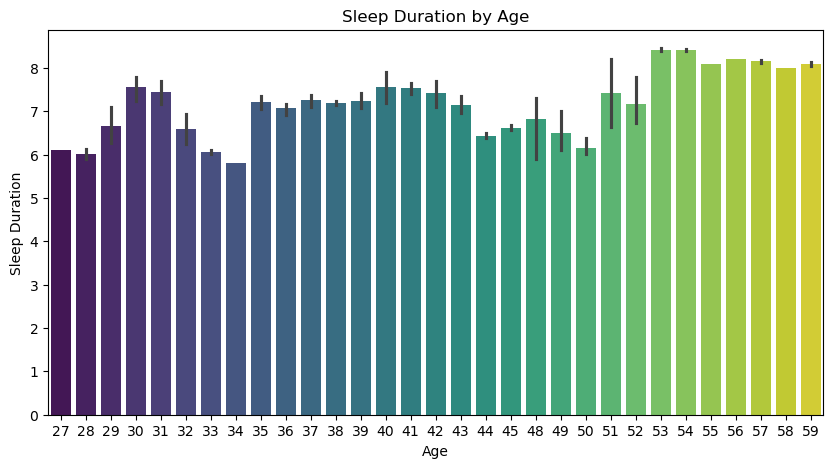

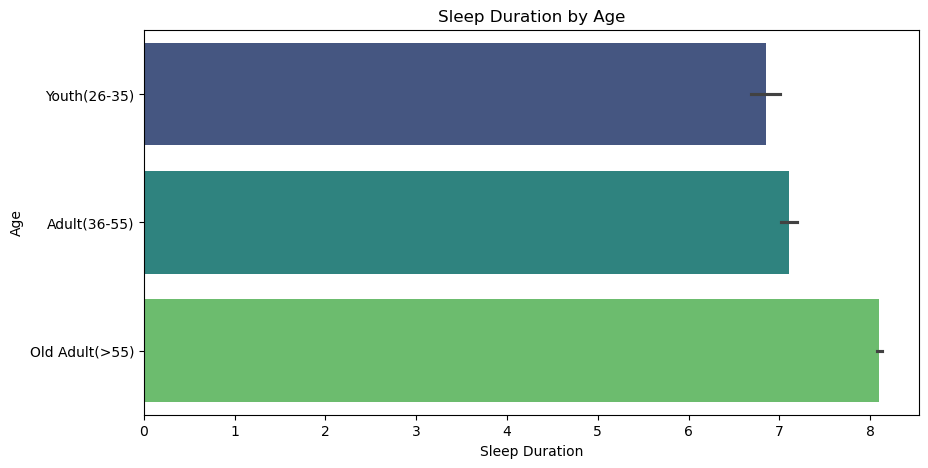

In [39]:
# Investigating the relationship between Age and sleep duration

plt.figure(figsize=(10,5))
sns.barplot(x = "Age", y= "Sleep Duration", data =df, palette='viridis')
plt.title("Sleep Duration by Age")
plt.ylabel("Sleep Duration")
plt.xlabel("Age")


plt.figure(figsize=(10,5))
sns.barplot(y = "Age_group", x= "Sleep Duration", data =df, palette='viridis')
plt.title("Sleep Duration by Age")
plt.xlabel("Sleep Duration")
plt.ylabel("Age")

There is a noticeable fluctuation in sleep duration across different ages.

Some age groups (e.g., early 30s) have lower sleep durations compared to others.

Sleep duration appears to be relatively low in the late 20s.

In the early 30s, sleep duration peaks but then drops around mid-30s.

From late 30s to early 40s, sleep duration remains stable with slight variations.

Around ages 50 and above, there seems to be an increase in sleep duration.

Younger adults (late 20s and early 30s) may experience shorter sleep durations due to work, stress, or lifestyle choices.

Sleep duration appears to stabilize in midlife (40s).

Older individuals (50+) tend to have longer sleep durations, possibly due to retirement or lifestyle changes.

C:\Users\Admin\AppData\Local\Temp\ipykernel_12452\4094893432.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Gender", y= "Sleep Duration", data =df, palette='viridis')


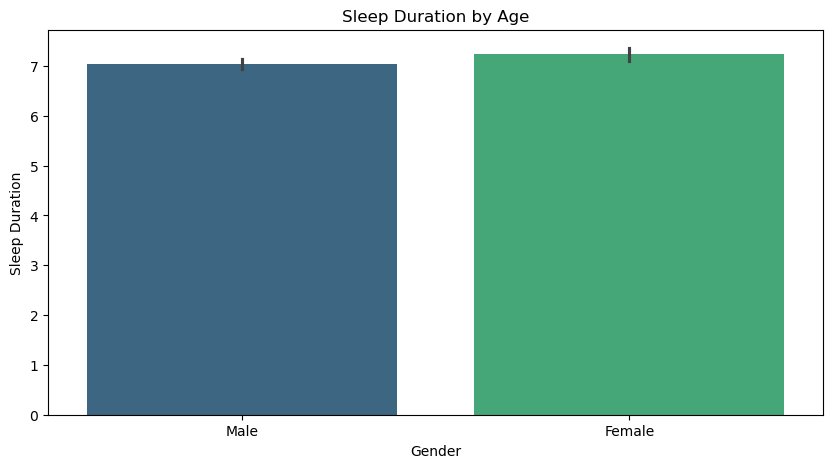

In [40]:
# Investigating the relationship between Gender and sleep duration

plt.figure(figsize=(10,5))
sns.barplot(x = "Gender", y= "Sleep Duration", data =df, palette='viridis')
plt.title("Sleep Duration by Age")
plt.ylabel("Sleep Duration")
plt.xlabel("Gender");

The female gender appear to have slightly more sleep than the male gender

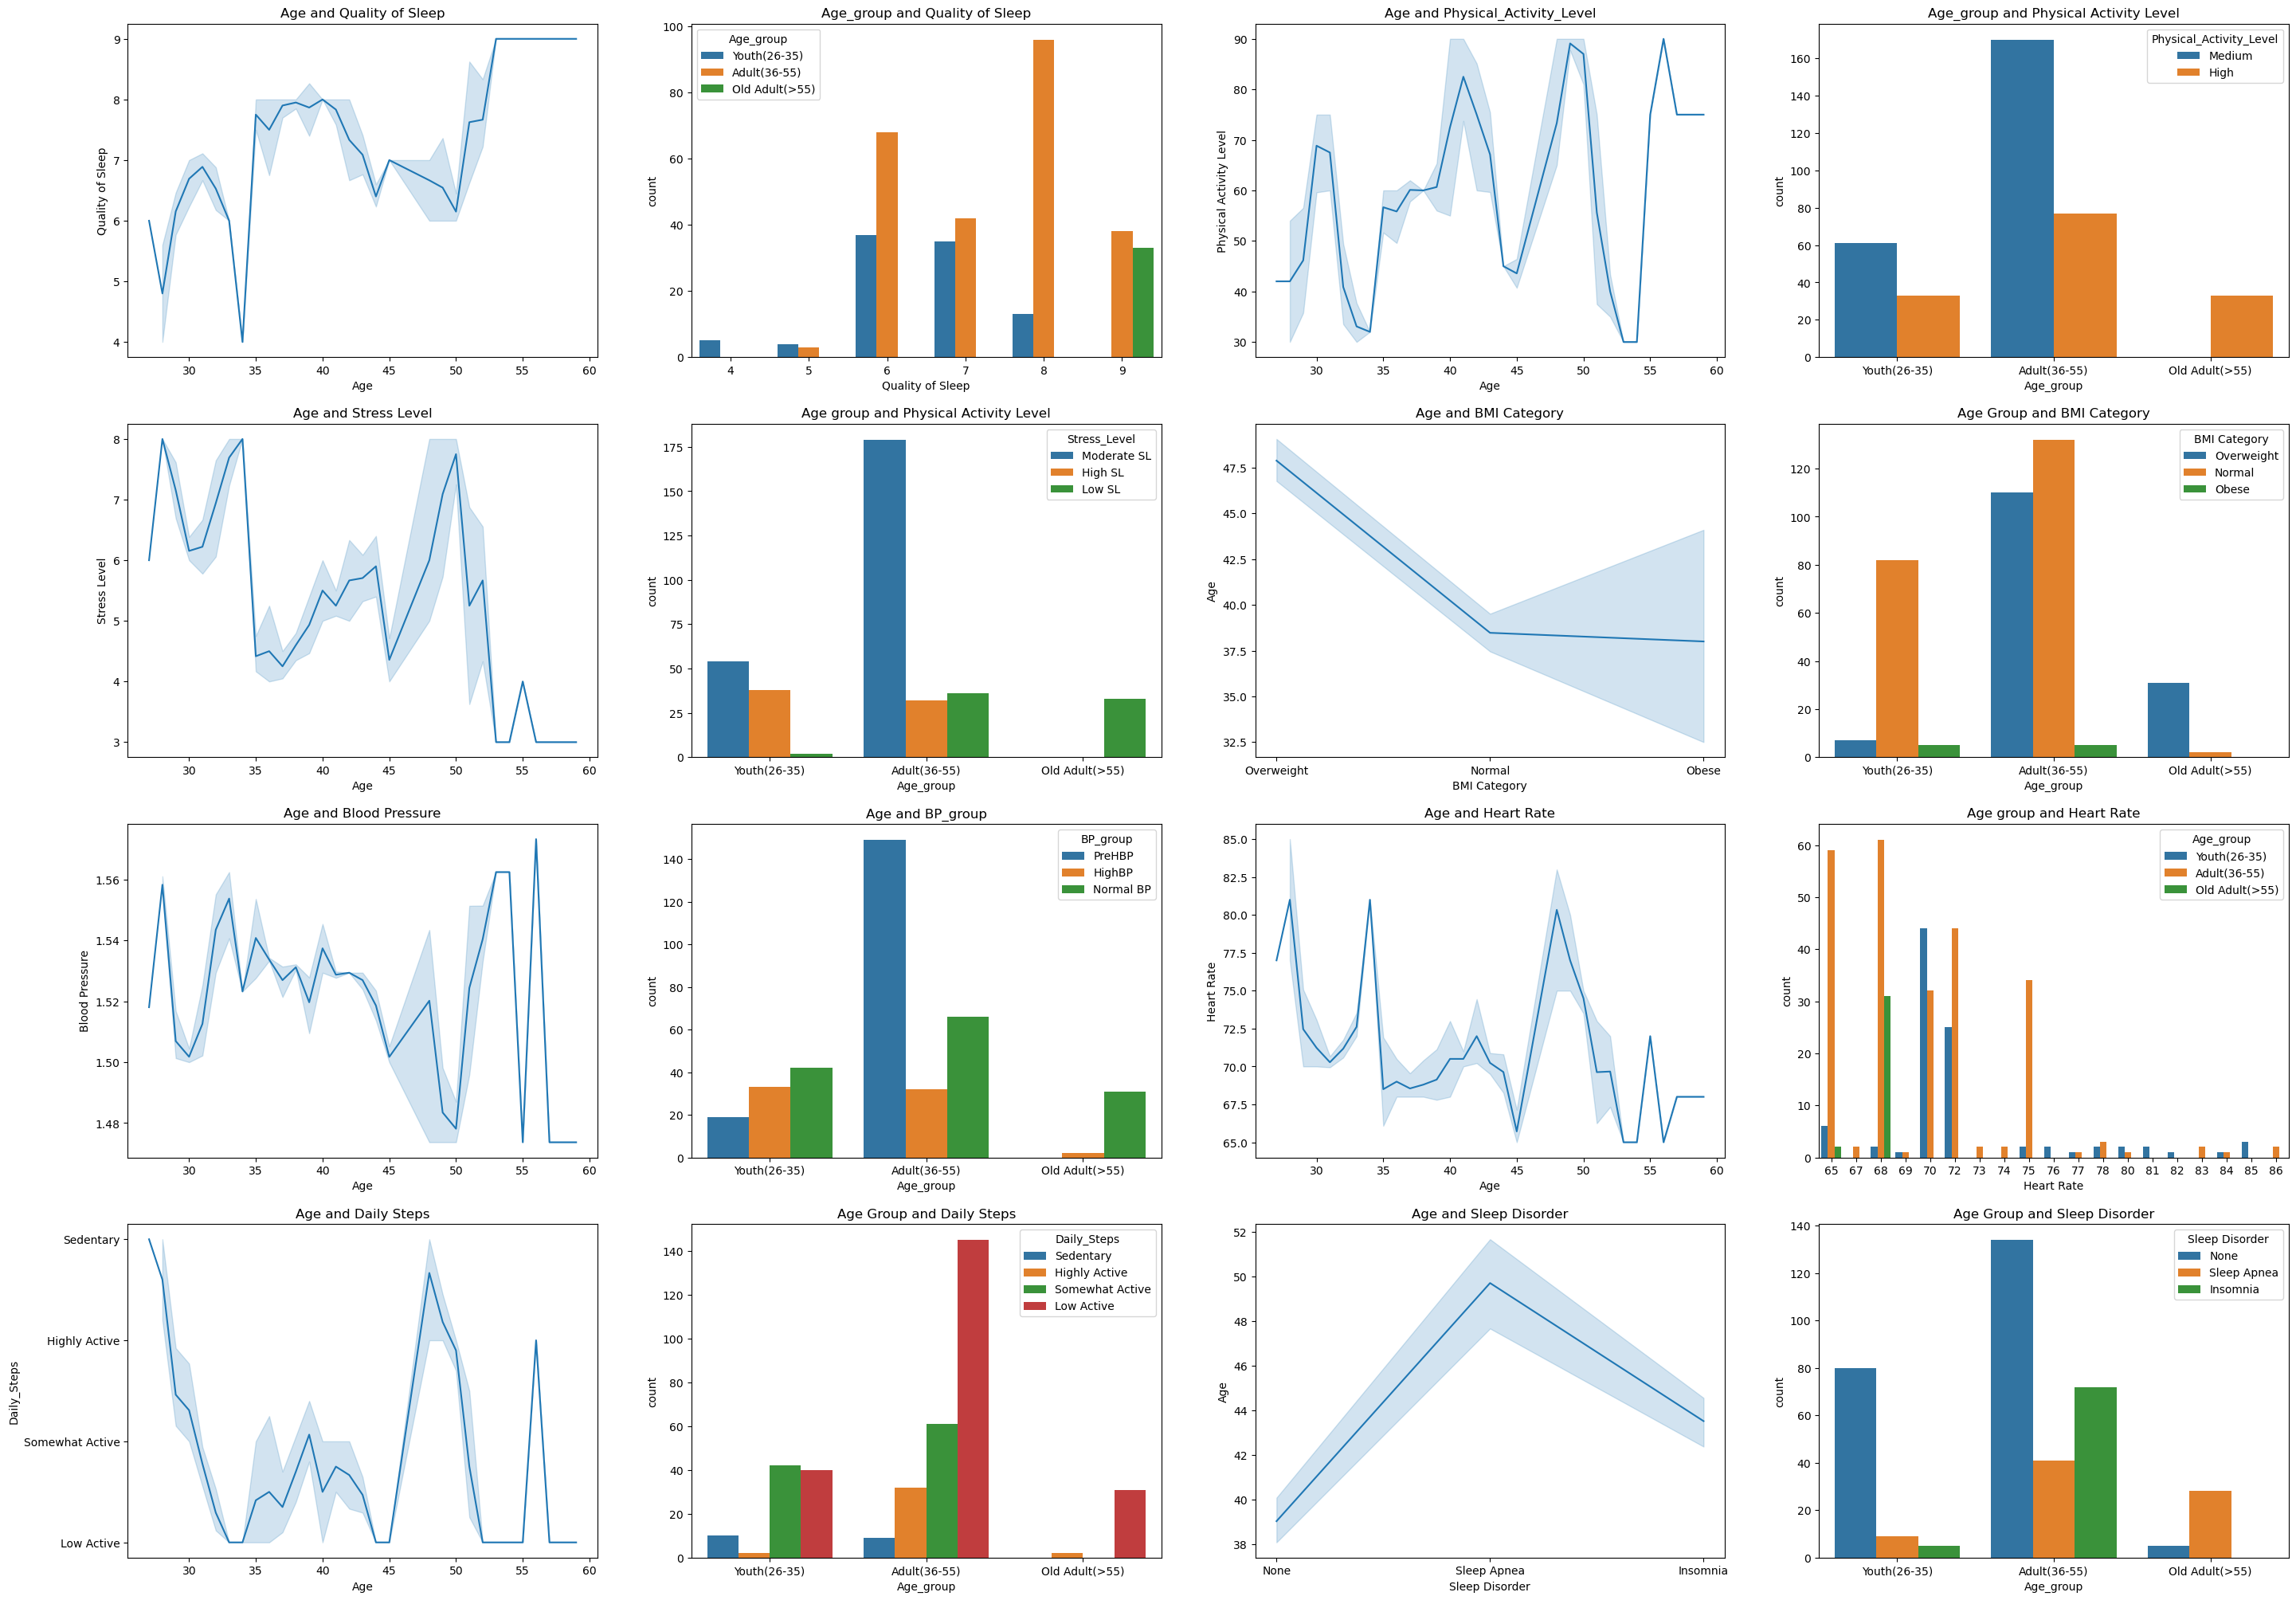

In [70]:
# Exploring the relationships between Age and other fetures of the dataset

fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(35, 25))

sns.lineplot(x= "Age", y= 'Quality of Sleep', data = df, ax=axs[0,0])
axs[0,0].set_title("Age and Quality of Sleep")

sns.countplot(hue ="Age_group", x= 'Quality of Sleep', data = df, ax=axs[0,1])
axs[0,1].set_title("Age_group and Quality of Sleep")

#feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

sns.lineplot(x=df['Age'], y= 'Physical Activity Level', data = df, ax=axs[0,2])
axs[0,2].set_title("Age and Physical_Activity_Level")

#sns.countplot(x=df["Occupation"].sort_values(ascending=False), data = df, ax=axs[0,2])
#axs[0,2].set_title("Occupation")

sns.countplot(x="Age_group", hue='Physical_Activity_Level',  data = df, ax=axs[0,3])
axs[0,3].set_title("Age_group and Physical Activity Level")

sns.lineplot(x="Age", y= 'Stress Level', data = df, ax=axs[1,0])
axs[1,0].set_title("Age and Stress Level")

sns.countplot(x="Age_group", hue='Stress_Level', data = df, ax=axs[1,1])
axs[1,1].set_title("Age group and Physical Activity Level")

sns.lineplot(y="Age", x='BMI Category', data = df, ax=axs[1,2])
axs[1,2].set_title("Age and BMI Category")

sns.countplot(hue="BMI Category", x = "Age_group", data = df, ax=axs[1,3])
axs[1,3].set_title("Age Group and BMI Category")

sns.lineplot(x="Age", y='Blood Pressure', data = df, ax=axs[2,0])
axs[2,0].set_title("Age and Blood Pressure")

sns.countplot(x= 'Age_group', hue="BP_group", data = df, ax=axs[2,1])
axs[2,1].set_title("Age and BP_group")

sns.lineplot(x='Age', y="Heart Rate", data = df, ax=axs[2,2])
axs[2,2].set_title("Age and Heart Rate")

sns.countplot(hue='Age_group', x="Heart Rate", data = df, ax=axs[2,3])
axs[2,3].set_title("Age group and Heart Rate")

sns.lineplot(x="Age", y= "Daily_Steps", data = df, ax=axs[3,0])
axs[3,0].set_title("Age and Daily Steps")

sns.countplot(x="Age_group", hue= "Daily_Steps", data = df, ax=axs[3,1])
axs[3,1].set_title("Age Group and Daily Steps")

sns.lineplot(y="Age", x= "Sleep Disorder", data = df, ax=axs[3,2])
axs[3,2].set_title("Age and Sleep Disorder")

sns.countplot(x="Age_group", hue= "Sleep Disorder", data = df, ax=axs[3,3])
axs[3,3].set_title("Age Group and Sleep Disorder");

Age and Quality of Sleep: Sleep quality fluctuates with age, showing variability across different age groups.

Age Group and Quality of Sleep: Adults (36-55) have the highest count of poor sleep quality.

Age and Physical Activity Level: Physical activity level varies significantly across age but declines slightly in older age.

Age Group and Physical Activity Level: Adults (36-55) have the highest physical activity level, while older adults (>55) are the least active.

Age and Stress Level: Stress level generally increases with age, peaking around midlife.

Age Group and Stress Level: Adults (36-55) report the highest stress levels.

Age and BMI Category: BMI trends downward in younger years and rises again in older adulthood.

Age Group and BMI Category: The majority of adults (36-55) are overweight, while older adults (>55) have the highest obesity rates.

Age and Blood Pressure: Blood pressure fluctuates with age but shows an increasing trend in later years.

Age Group and BP Group: Adults (36-55) have the highest prevalence of high blood pressure.

Age and Heart Rate: Heart rate varies across different age groups, with fluctuations over time.

Age Group and Heart Rate: Older adults (>55) tend to have lower heart rates compared to younger individuals.

Age and Daily Steps: Daily step count declines with age, with significant drops in older adults.

Age Group and Daily Steps: Older adults (>55) have the lowest daily step counts, while youth (<35) are the most active.

Age and Sleep Disorder: Sleep disorders increase with age, peaking in older adulthood.

Age Group and Sleep Disorder: Adults (36-55) have the highest prevalence of sleep apnea, while older adults (>55) report more insomnia.

Text(0.5, 1.0, 'Quality of sleep and Sleep Disorder')

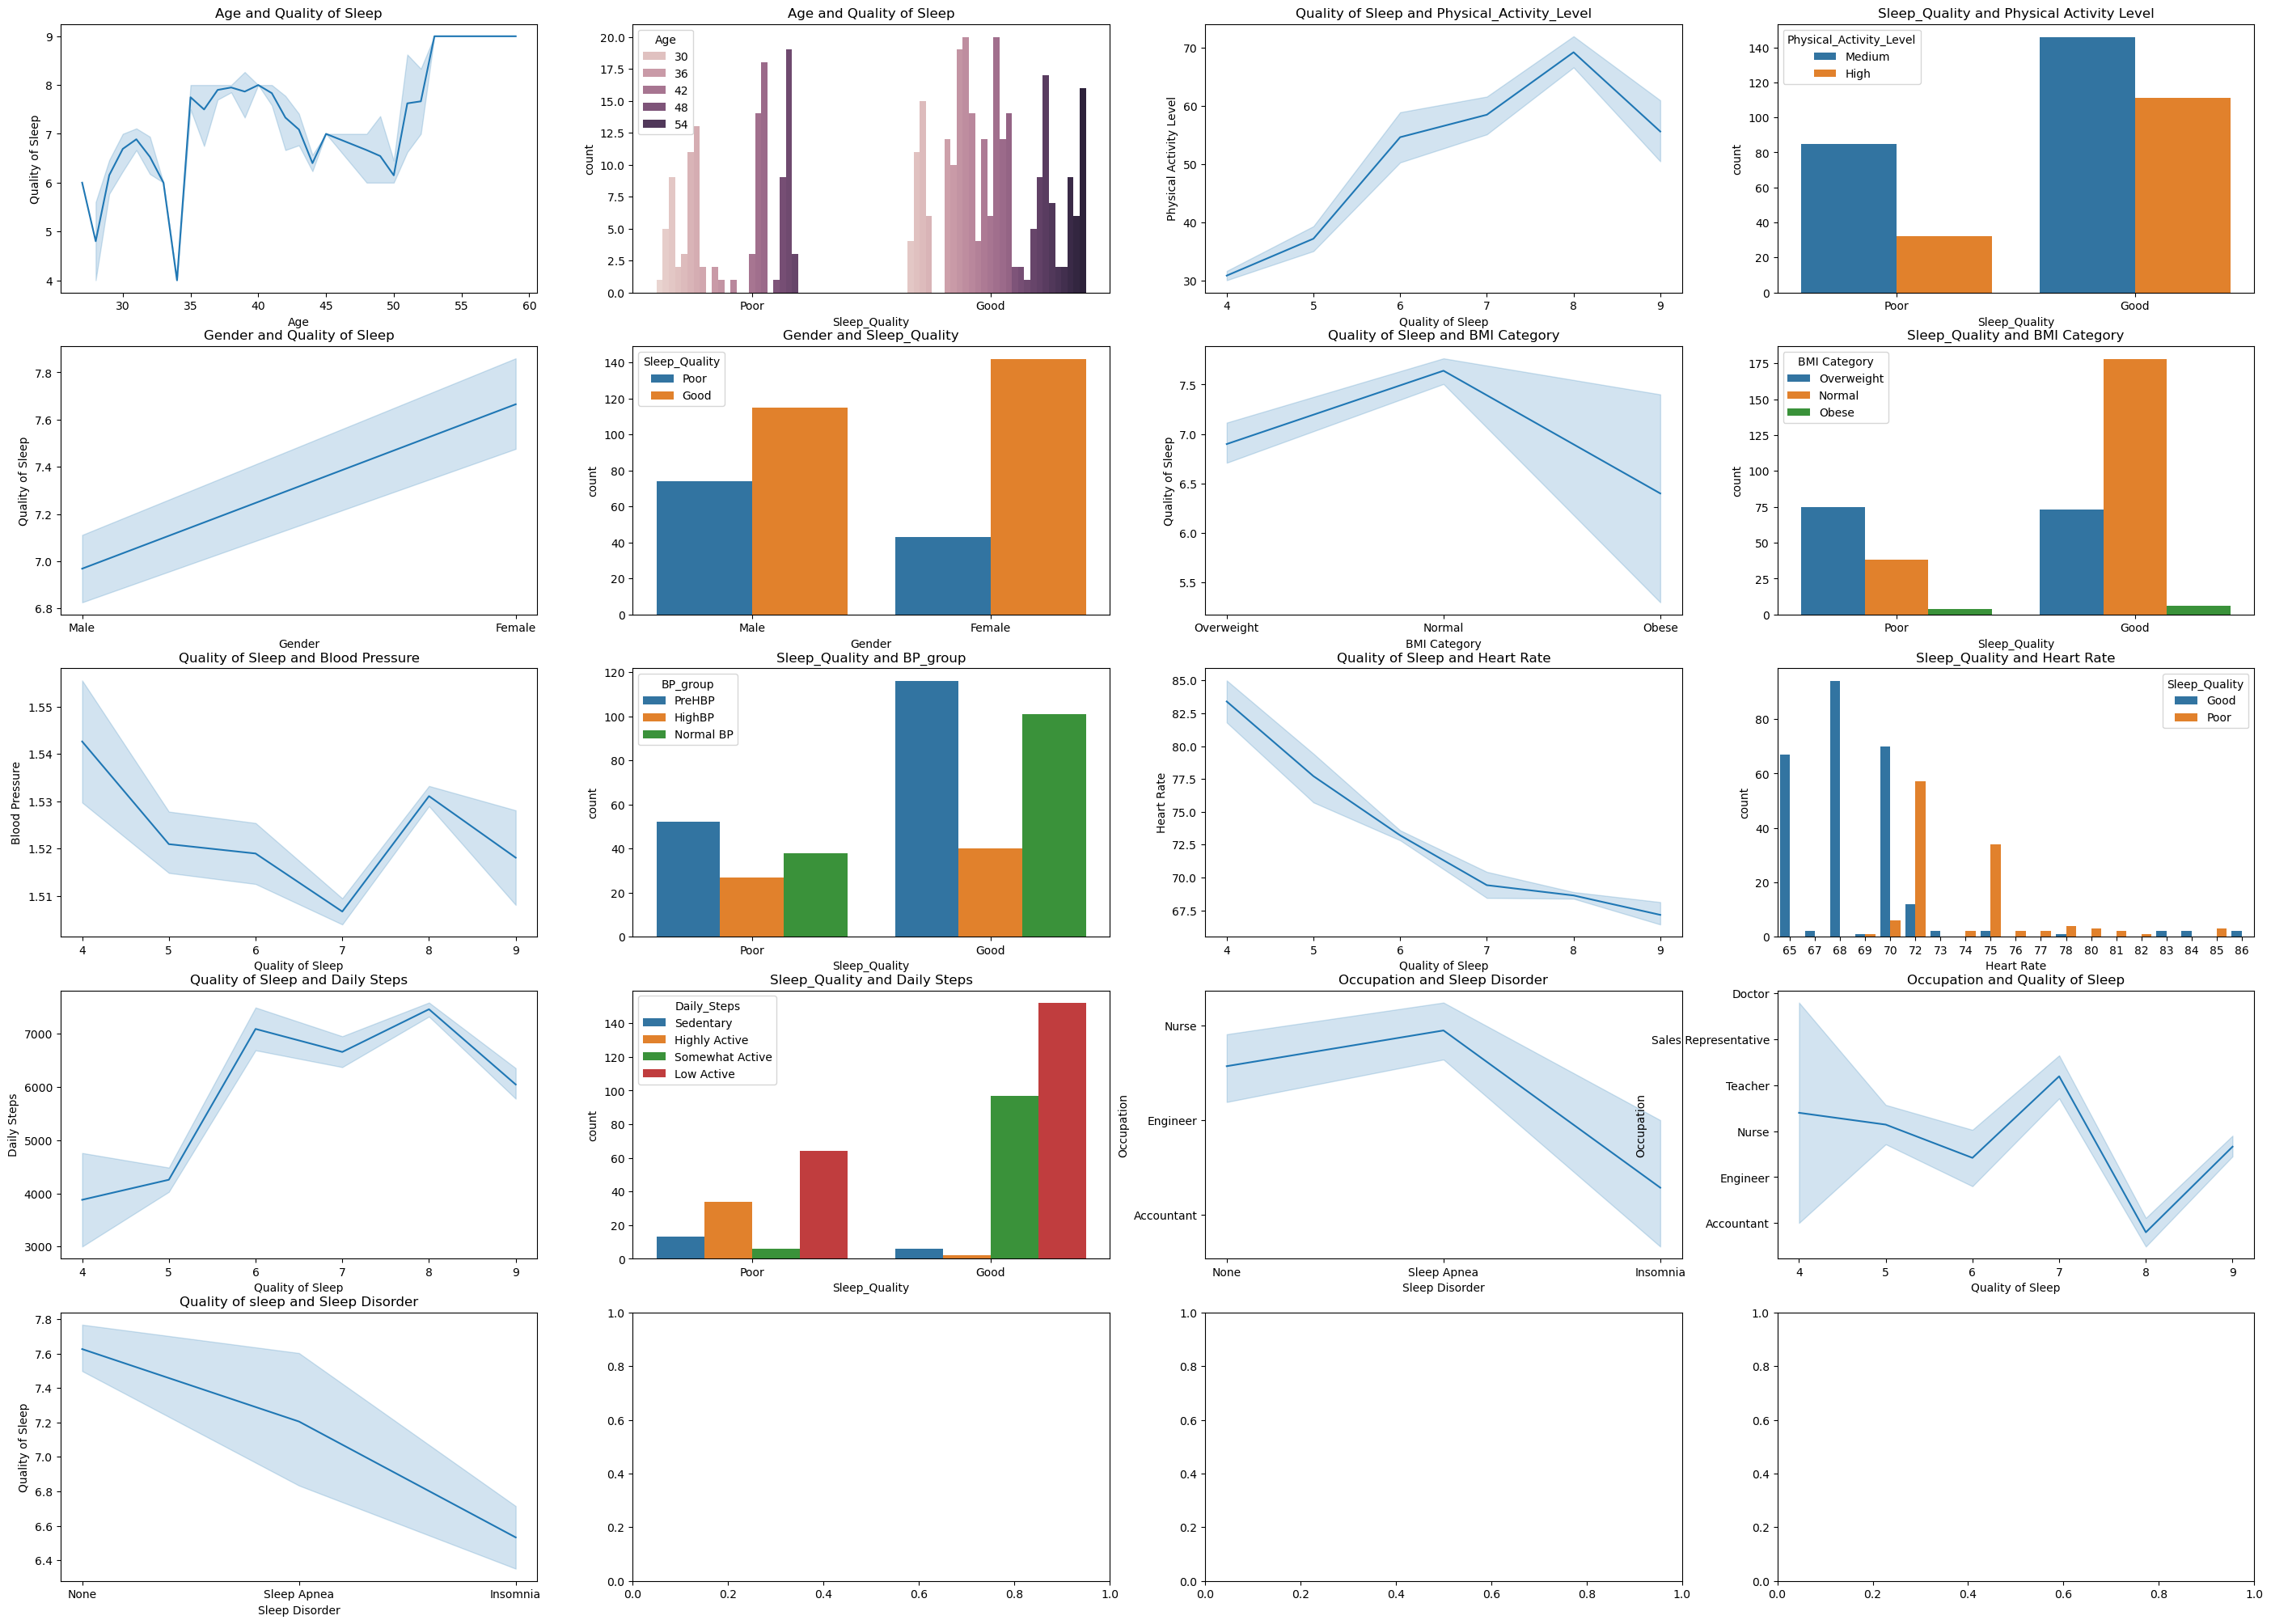

In [79]:
# Exploring the relationships between Quality of Sleep and other features of the dataset

fig, axs = plt.subplots(ncols=4, nrows=5, figsize=(35, 25))

sns.lineplot(x= "Age", y= 'Quality of Sleep', data = df, ax=axs[0,0])
axs[0,0].set_title("Age and Quality of Sleep")

sns.countplot(hue ="Age", x= 'Sleep_Quality', data = df, ax=axs[0,1])
axs[0,1].set_title("Age and Quality of Sleep")

#feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

sns.lineplot(x=df['Quality of Sleep'], y= 'Physical Activity Level', data = df, ax=axs[0,2])
axs[0,2].set_title("Quality of Sleep and Physical_Activity_Level")

#sns.countplot(x=df["Occupation"].sort_values(ascending=False), data = df, ax=axs[0,2])
#axs[0,2].set_title("Occupation")

sns.countplot(x="Sleep_Quality", hue='Physical_Activity_Level',  data = df, ax=axs[0,3])
axs[0,3].set_title("Sleep_Quality and Physical Activity Level")

sns.lineplot(x="Gender", y= 'Quality of Sleep', data = df, ax=axs[1,0])
axs[1,0].set_title("Gender and Quality of Sleep")

sns.countplot(x="Gender", hue='Sleep_Quality', data = df, ax=axs[1,1])
axs[1,1].set_title("Gender and Sleep_Quality")

sns.lineplot(y="Quality of Sleep", x='BMI Category', data = df, ax=axs[1,2])
axs[1,2].set_title("Quality of Sleep and BMI Category")

sns.countplot(hue="BMI Category", x = "Sleep_Quality", data = df, ax=axs[1,3])
axs[1,3].set_title("Sleep_Quality and BMI Category")

sns.lineplot(x="Quality of Sleep", y='Blood Pressure', data = df, ax=axs[2,0])
axs[2,0].set_title("Quality of Sleep and Blood Pressure")

sns.countplot(x= 'Sleep_Quality', hue="BP_group", data = df, ax=axs[2,1])
axs[2,1].set_title("Sleep_Quality and BP_group")

sns.lineplot(x='Quality of Sleep', y="Heart Rate", data = df, ax=axs[2,2])
axs[2,2].set_title("Quality of Sleep and Heart Rate")

sns.countplot(hue='Sleep_Quality', x="Heart Rate", data = df, ax=axs[2,3])
axs[2,3].set_title("Sleep_Quality and Heart Rate")

sns.lineplot(x="Quality of Sleep", y= "Daily Steps", data = df, ax=axs[3,0])
axs[3,0].set_title("Quality of Sleep and Daily Steps")

sns.countplot(x="Sleep_Quality", hue= "Daily_Steps", data = df, ax=axs[3,1])
axs[3,1].set_title("Sleep_Quality and Daily Steps")

sns.lineplot(y="Occupation", x= "Sleep Disorder", data = df, ax=axs[3,2])
axs[3,2].set_title("Occupation and Sleep Disorder")

sns.lineplot(y="Occupation", x= "Quality of Sleep", data = df, ax=axs[3,3])
axs[3,3].set_title("Occupation and Quality of Sleep");

sns.lineplot(y="Quality of Sleep", x= "Sleep Disorder", data = df, ax=axs[4,0])
axs[4,0].set_title("Quality of sleep and Sleep Disorder")

Age and Quality of Sleep: Sleep quality varies with age, showing fluctuations across different age groups.

Age and Quality of Sleep (Bar Chart): Sleep quality distribution differs by age, with some age groups experiencing more poor sleep.

Quality of Sleep and Physical Activity Level: Higher sleep quality is associated with higher physical activity levels.

Sleep Quality and Physical Activity Level: Individuals with good sleep quality are more likely to have high physical activity levels.

Gender and Quality of Sleep: Females tend to have better sleep quality than males.

Gender and Sleep Quality (Bar Chart): More females report good sleep quality compared to males.

Quality of Sleep and BMI Category: Higher sleep quality is associated with lower BMI categories.

Sleep Quality and BMI Category: People with good sleep quality are more likely to have a normal BMI.

Quality of Sleep and Blood Pressure: Better sleep quality is linked to more stable blood pressure levels.

Sleep Quality and BP Group: Individuals with good sleep quality tend to have normal blood pressure.

Quality of Sleep and Heart Rate: Higher sleep quality is linked to lower heart rates.

Sleep Quality and Heart Rate: Poor sleep quality is associated with higher heart rates.

Quality of Sleep and Daily Steps: People with better sleep quality tend to take more daily steps.

Sleep Quality and Daily Steps: Highly active individuals are more likely to have good sleep quality.

Occupation and Sleep Disorder: Certain occupations, like nurses, show higher instances of sleep disorders.

Occupation and Quality of Sleep: Sleep quality varies by occupation, with some professions experiencing poorer sleep, eg Nurse, Sales Representative, Software Engineer, Teacher, Driver, Doctor

### Encoding categorical variables

##### Using Label Encoding

In [ ]:
# Import the relevant libraries


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, auc
from sklearn.metrics import roc_curve, roc_auc_score, balanced_accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
import joblib

In [80]:
df.head(2)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Age_group,BP_group,Sleep_Duration,Sleep_Quality,Physical_Activity_Level,Stress_Level,Daily_Steps
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,1.518072,77,4200,None,Youth(26-35),PreHBP,Not Enough,Poor,Medium,Moderate SL,Sedentary
1,2,Male,28,Doctor,6.2,6,60,8,Normal,1.562500,75,10000,None,Youth(26-35),HighBP,Not Enough,Poor,Medium,High SL,Highly Active


In [81]:
# Remove unrequired feartures

df.drop(columns = ['Age_group','BP_group', 'Sleep_Duration', 'Sleep_Quality', 'Physical_Activity_Level', 'Stress_Level', 'Daily_Steps'], inplace=True)
df.head(2)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,1.518072,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,1.562500,75,10000,None


In [82]:
encoder = LabelEncoder()

for c in df.columns[0:]:
    if (df[c].dtypes=='object'):
        df[c] = encoder.fit_transform(df[c])
    else: 
        df[c] = df[c]

df.head()

<IPython.core.display.Javascript object>

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,1,27,9,6.1,6,42,6,2,1.518072,77,4200,1
1,2,1,28,1,6.2,6,60,8,0,1.562500,75,10000,1
2,3,1,28,1,6.2,6,60,8,0,1.562500,75,10000,1
3,4,1,28,6,5.9,4,30,8,1,1.555556,85,3000,2
4,5,1,28,6,5.9,4,30,8,1,1.555556,85,3000,2


In [85]:
df.drop(columns = ['Person ID'], inplace=True)
df.head(2)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,27,9,6.1,6,42,6,2,1.518072,77,4200,1
1,1,28,1,6.2,6,60,8,0,1.562500,75,10000,1


In [86]:
df.describe()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,0.505348,42.184492,3.772727,7.132086,7.312834,59.171123,5.385027,0.818182,1.520131,70.165775,6816.844920,1.002674
std,0.500641,8.673133,3.056081,0.795657,1.196956,20.830804,1.774526,0.970940,0.029349,4.135676,1617.915679,0.644626
min,0.000000,27.000000,0.000000,5.800000,4.000000,30.000000,3.000000,0.000000,1.473684,65.000000,3000.000000,0.000000
25%,0.000000,35.250000,1.000000,6.400000,6.000000,45.000000,4.000000,0.000000,1.500000,68.000000,5600.000000,1.000000
50%,1.000000,43.000000,3.000000,7.200000,7.000000,60.000000,5.000000,0.000000,1.529412,70.000000,7000.000000,1.000000
75%,1.000000,50.000000,5.000000,7.800000,8.000000,75.000000,7.000000,2.000000,1.533333,72.000000,8000.000000,1.000000
max,1.000000,59.000000,10.000000,8.500000,9.000000,90.000000,8.000000,2.000000,1.573333,86.000000,10000.000000,2.000000


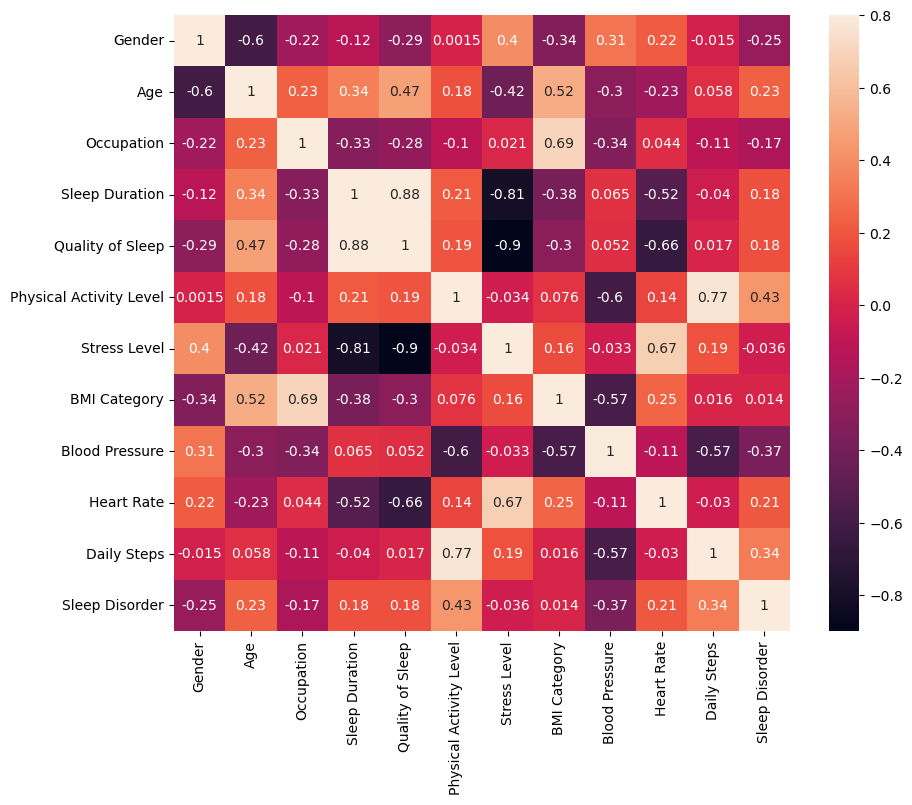

In [87]:
# Correlation between Quality of Sleep and other features
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), vmax=0.8, square = True, annot = True);

The sleep duration and Quality of sleep are highly correlated with a value of 0.88, which could lead to a case of multicollinearity

Occupation and Age is also positively correlated to BMI category

A negative correllation exist between Sleep duration, Quality of sleep and Stress level

Daily Steps and Physical Activity level is also highly correlated.

Heart rate and Stress level are highly correlated too

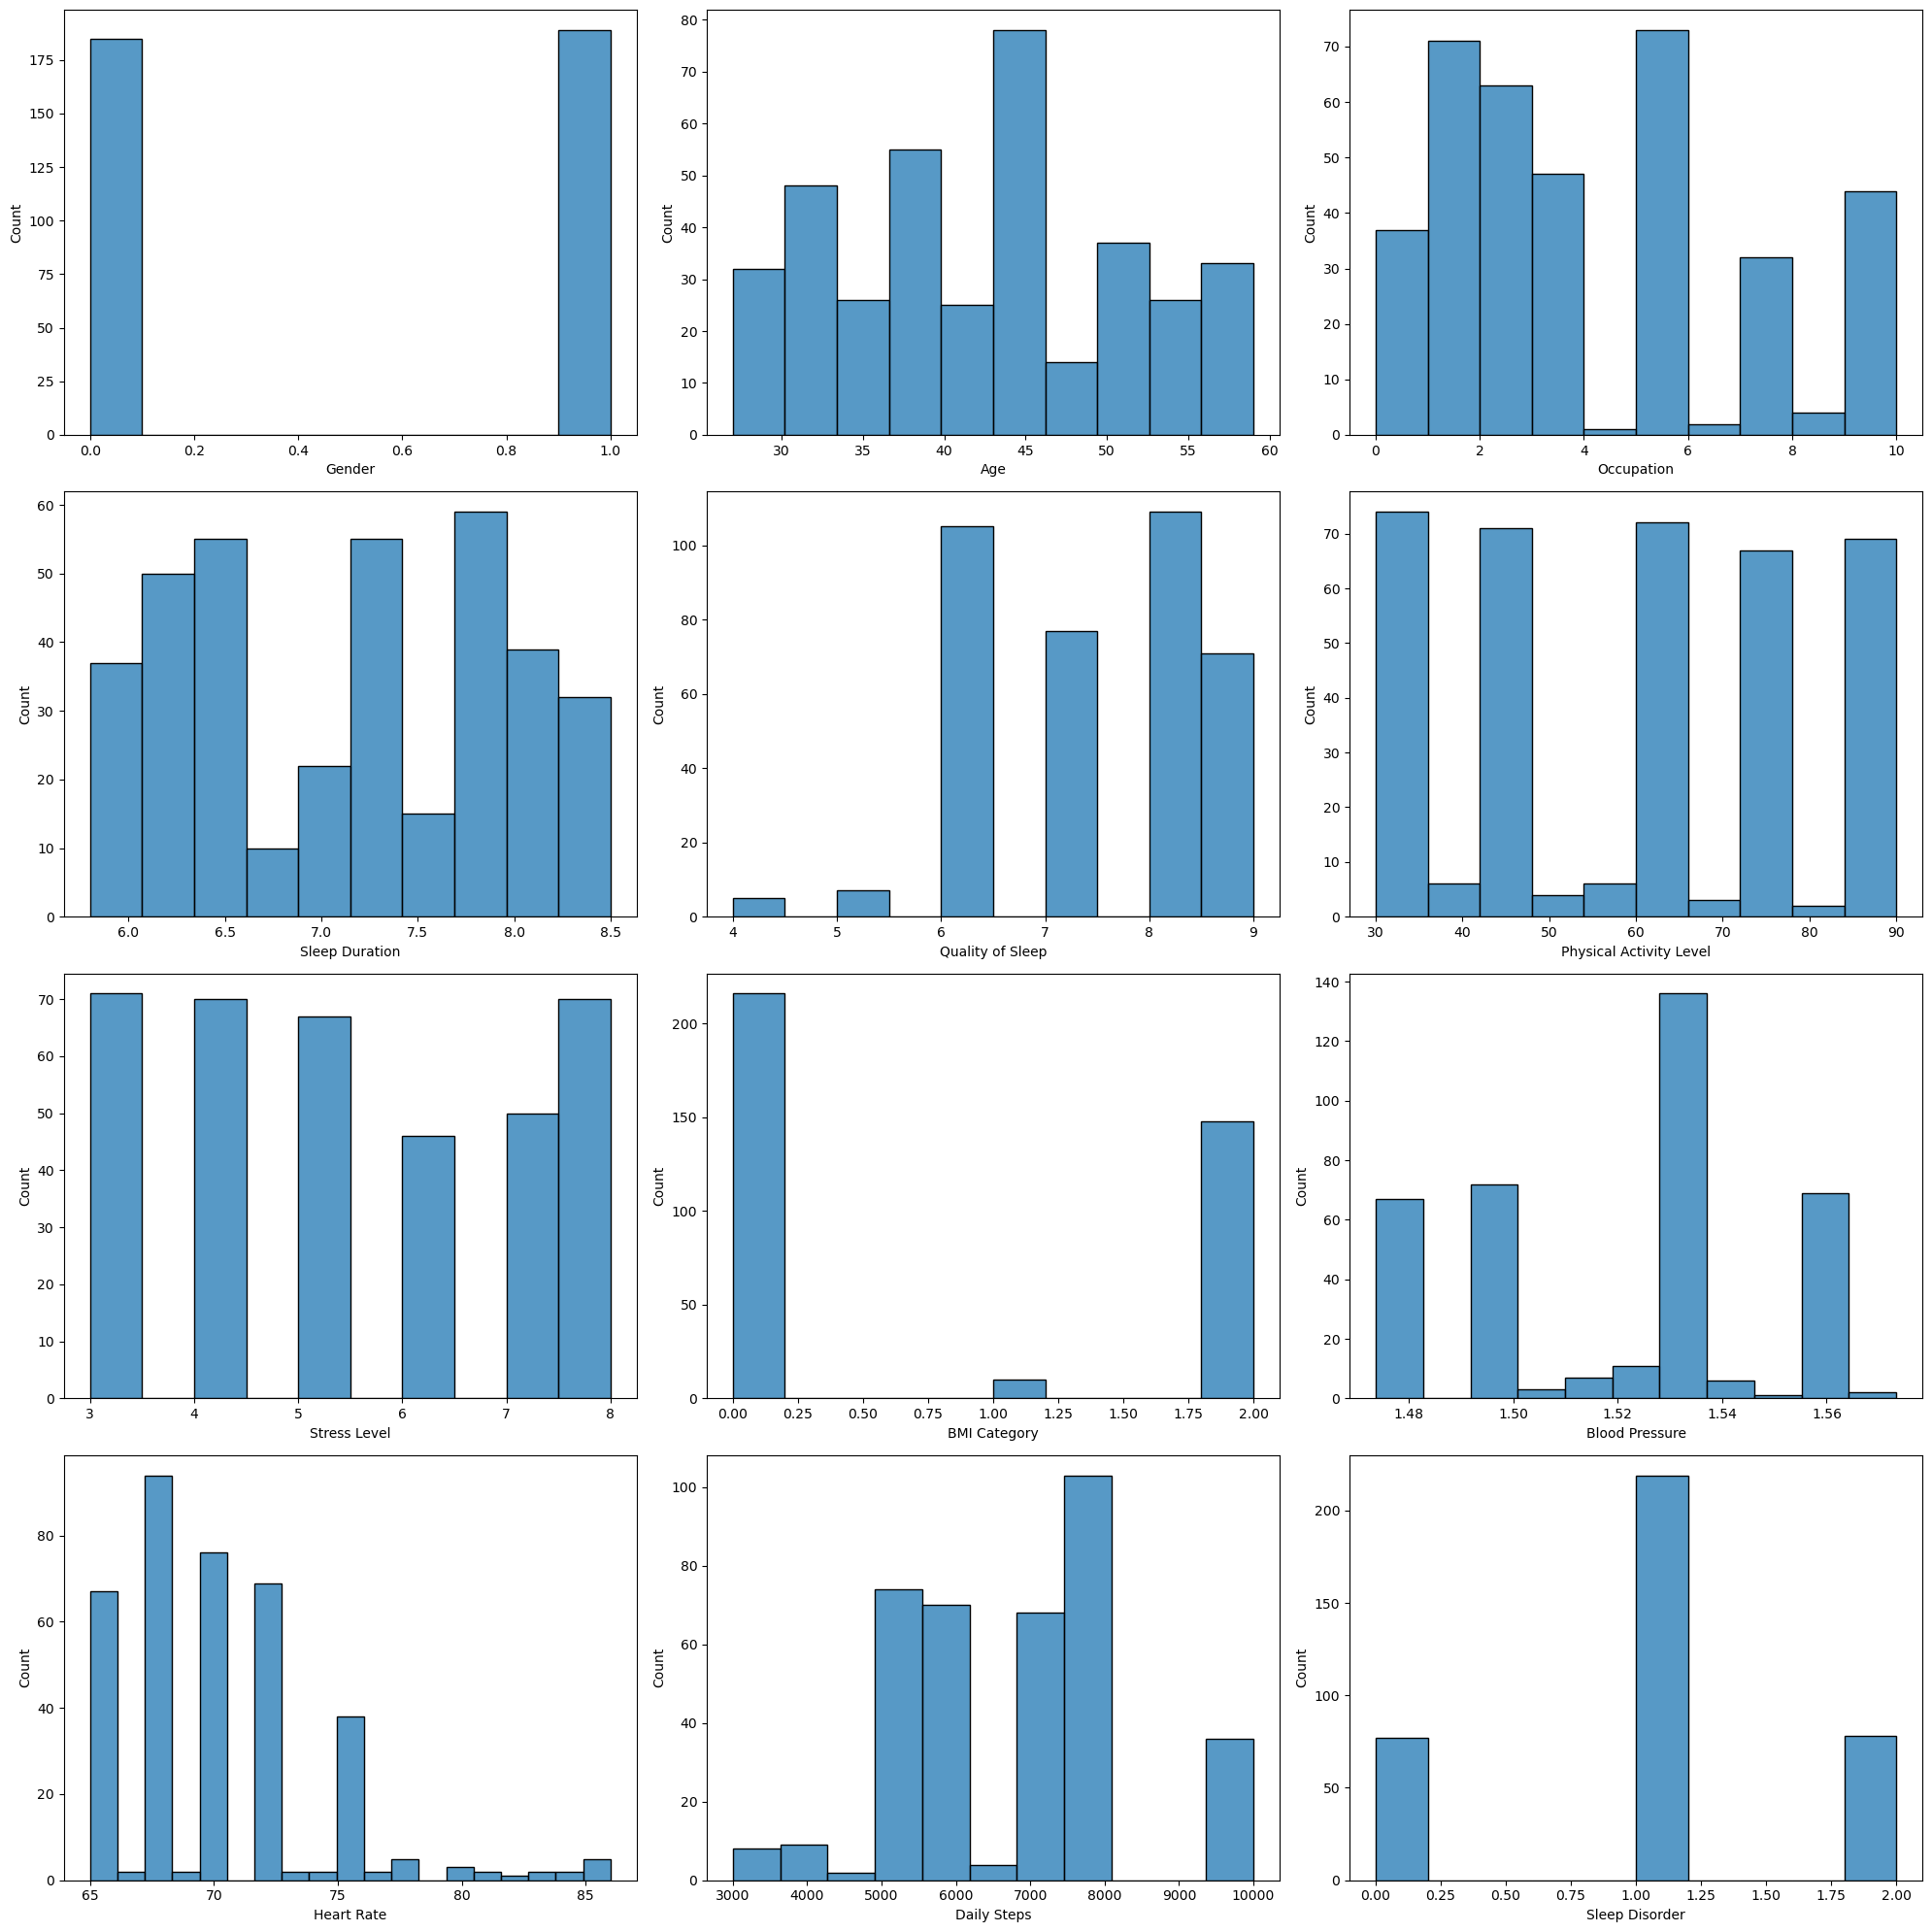

In [89]:
# Reviewing and Visualizing the data distribution

fig, position = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
position = position.flatten()

for index, column_name in enumerate(df.select_dtypes(include="number")):
    sns.histplot(df[column_name], ax=position[index])

plt.tight_layout()
plt.show()

The features are slightly skewed, i'll use the standard scaler in standardizing the values

In [91]:
df.head(2)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,27,9,6.1,6,42,6,2,1.518072,77,4200,1
1,1,28,1,6.2,6,60,8,0,1.562500,75,10000,1


### Modelling (Quality Sleep Prediction)

In [92]:
# Separating the features from the Target/Label

label = df["Sleep Duration"]

In [93]:
features = df.drop("Sleep Duration", axis=1)

In [94]:
df.drop("Sleep Duration", axis=1)

,Gender,Age,Occupation,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,27,9,6,42,6,2,1.518072,77,4200,1
1,1,28,1,6,60,8,0,1.562500,75,10000,1
2,1,28,1,6,60,8,0,1.562500,75,10000,1
3,1,28,6,4,30,8,1,1.555556,85,3000,2
4,1,28,6,4,30,8,1,1.555556,85,3000,2
...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,5,9,75,3,2,1.473684,68,7000,2
370,0,59,5,9,75,3,2,1.473684,68,7000,2
371,0,59,5,9,75,3,2,1.473684,68,7000,2
372,0,59,5,9,75,3,2,1.473684,68,7000,2


### Data splitting and Feature scaling¶

#### Split the data into training and testing sets

In [95]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

<IPython.core.display.Javascript object>

In [96]:
X_train.head()

,Gender,Age,Occupation,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
192,1,43,7,6,45,7,2,1.529412,72,6000,0
75,1,33,1,6,30,8,0,1.562500,72,5000,1
84,1,35,9,8,60,5,0,1.500000,70,8000,1
362,0,59,5,9,75,3,2,1.473684,68,7000,2
16,0,29,5,5,40,7,0,1.517241,80,4000,2


In [111]:
# Initialize the scaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<IPython.core.display.Javascript object>

In [108]:
# Initialize the model
# Since target variable is continuous, i'll use a regression model  e.g LinearRegression, RandomForestRegressor, or XGBoostRegressor:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = LinearRegression()

#Training the model
model.fit(X_train_scaled, y_train)

# Getting predictions
y_pred = model.predict(X_test_scaled)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.2396
Mean Squared Error (MSE): 0.0868
Root Mean Squared Error (RMSE): 0.2947
R² Score: 0.8696


In [110]:

# Checking the train score

# Make predictions on training set
y_train_pred = model.predict(X_train_scaled)

# Calculate evaluation metrics for training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Print results
print(f"Train Set Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_train:.4f}")
print(f"Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"R² Score: {r2_train:.4f}")

Train Set Evaluation:
Mean Absolute Error (MAE): 0.0411
Mean Squared Error (MSE): 0.0032
Root Mean Squared Error (RMSE): 0.0562
R² Score: 0.9949


Interpreting the Regression result

🔹 1. Mean Absolute Error (MAE): 0.2396 

MAE measures the average absolute difference between actual and predicted values.

On average, the model’s predictions are off by ~0.24 units.

Lower values indicate better performance.

🔹 2. Mean Squared Error (MSE): 0.0868
MSE is the average squared error between actual and predicted values.

Since errors are squared, larger errors impact the score more, making it sensitive to outliers.

Lower is better, meaning the model isn't making huge errors.

🔹 3. Root Mean Squared Error (RMSE): 0.2947
RMSE is the square root of MSE, giving an interpretable error in the same unit as the target variable.

The model has an average error of ~0.29 units, meaning predictions are usually within this range.

Similar to MAE but penalizes larger errors more.

🔹 4. R² Score: 0.8696 (86.96%)
R² measures how well the model explains the variance in the data.

A value of 0.8696 (86.96%) means your model explains ~87% of the variance, which is very good.

A model with R² = 1 would perfectly predict the target, while R² = 0 means it’s no better than guessing the mean.

The model is performing well with an R² of 86.96% and a relatively low error.

In [109]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)

#Train the model
model.fit(X_train_scaled, y_train)

# Get predictions
predictions = model.predict(X_test_scaled)

#y_pred = model.predict(X_test_scaled)

# Calculate metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.0568
Mean Squared Error (MSE): 0.0060
Root Mean Squared Error (RMSE): 0.0773
R² Score: 0.9910


The Random Forest Regressor performed significantly better than the Linear Regression model.

🔹 1. Mean Absolute Error (MAE): 0.0568
The average absolute difference between actual and predicted values is just 0.0568 units.

This is much lower than the MAE for Linear Regression (0.2396), meaning the model makes much smaller mistakes on average.

🔹 2. Mean Squared Error (MSE): 0.0060
Measures the average squared error between predictions and actual values.

Since squared errors penalize large mistakes, this very small value suggests the model rarely makes large errors.

🔹 3. Root Mean Squared Error (RMSE): 0.0773
The RMSE is the square root of MSE, making it more interpretable.

The model’s average prediction error is only ~0.0773 units, meaning it is very accurate.

🔹 4. R² Score: 0.9910 (99.10%)
R² measures how well the model explains the variance in the data.

99.10% means the model explains nearly all the variability in the target variable!

Compared to the Linear Regression R² (86.96%), this is a huge improvement.

The RandomForestRegressor is highly accurate! 
✔ MAE, MSE, and RMSE are much lower than in Linear Regression.
✔ R² score of 99.10% means the model almost perfectly fits the data.
✔ Random Forest handles non-linear patterns well, so it likely captures relationships that Linear Regression missed.

In [112]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Make predictions on the test set
# y_test_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
# mae_test = mean_absolute_error(y_test, y_test_pred)
# mse_test = mean_squared_error(y_test, y_test_pred)
# rmse_test = np.sqrt(mse_test)
# r2_test = r2_score(y_test, y_test_pred)

# Print results
# print(f"Test Set Evaluation:")
# print(f"Mean Absolute Error (MAE): {mae_test:.4f}")
# print(f"Mean Squared Error (MSE): {mse_test:.4f}")
# print(f"Root Mean Squared Error (RMSE): {rmse_test:.4f}")
# print(f"R² Score: {r2_test:.4f}")




# Evaluate the model on X_test_scaled, y_test (unseen data).

# Compare train vs. test scores to check for overfitting.

In [113]:
# To confirm if 
# import numpy as np
# print(np.unique(y_train))